Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [10]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 4, 10, 1, 8, 1, 13, 5, 5, 6, 10, 4,…
$ Glucose                  <dbl> 85, 89, 115, 110, 139, 103, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 0, 92, 80, 30, 84, 66, 82, 92, 75, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 0, 15, 19, 0, 26, 0, 31,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 0, 140, 110, 0, 0, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 35.3, 37.6, 27.1, 43.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.191, 1.441, 0.183, 0.3…
$ Age                      <dbl> 31, 21, 29, 30, 57, 33, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The "outcome" variable is best suited for the outcome in a logistic regression model. It appears to be built as a binary variable, with 0 meaning an outcome of "no diabetes" and 1 meaning an outcome of "diabetes."

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration: 2 hours in an oral glucose tolerance test            |
| BMI         | Body Mass Index: weight in kg/(height in m)^2            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

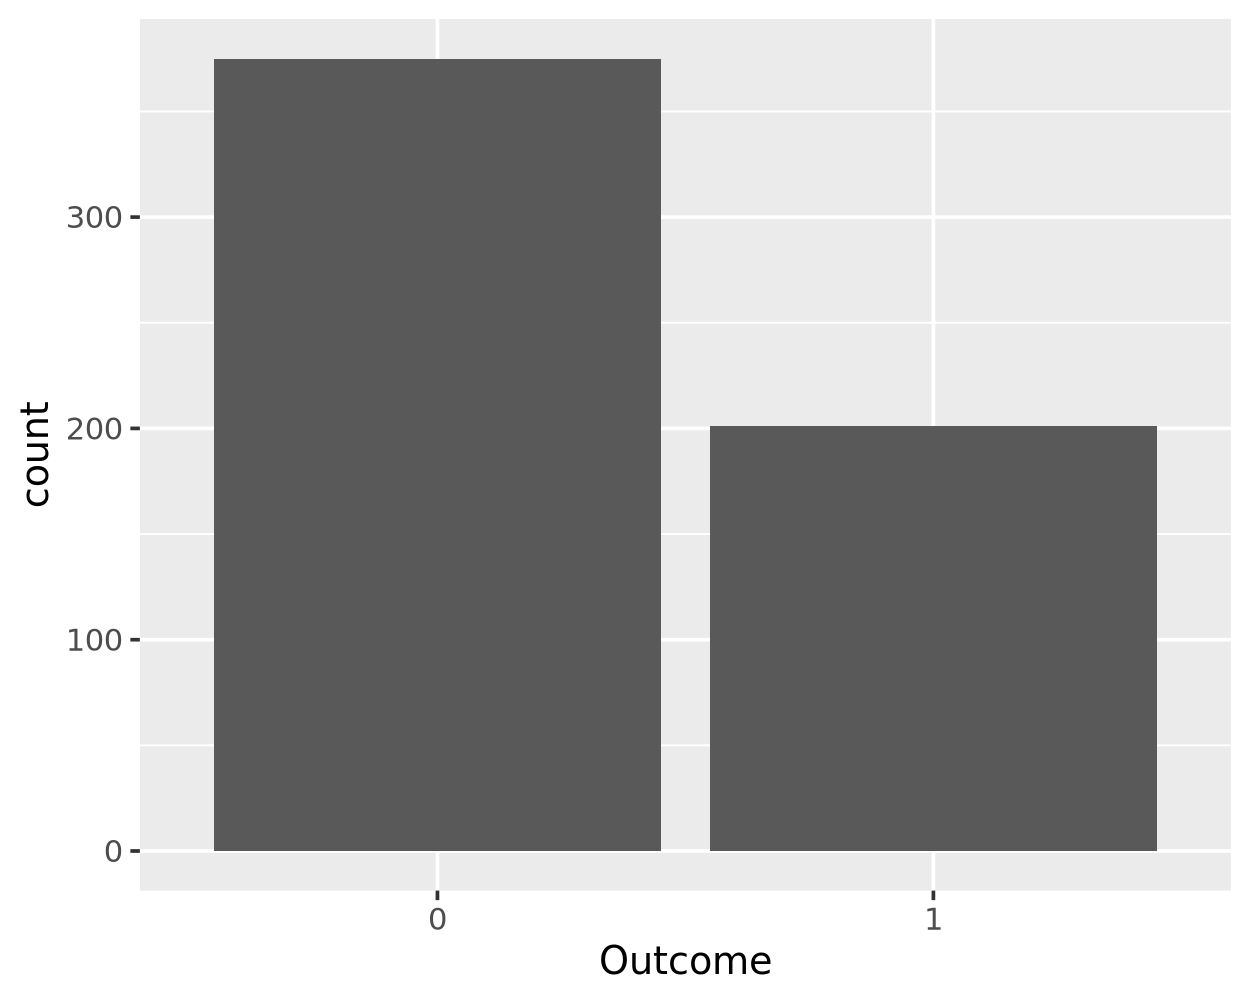

In [4]:
ggplot(data = diabetes_train, aes(x = Outcome)) +
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced. We do not have ecounts counts of each outcome. There are more outcomes labeled 0, meaning there are more outcomes labeled "no diabetes."



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

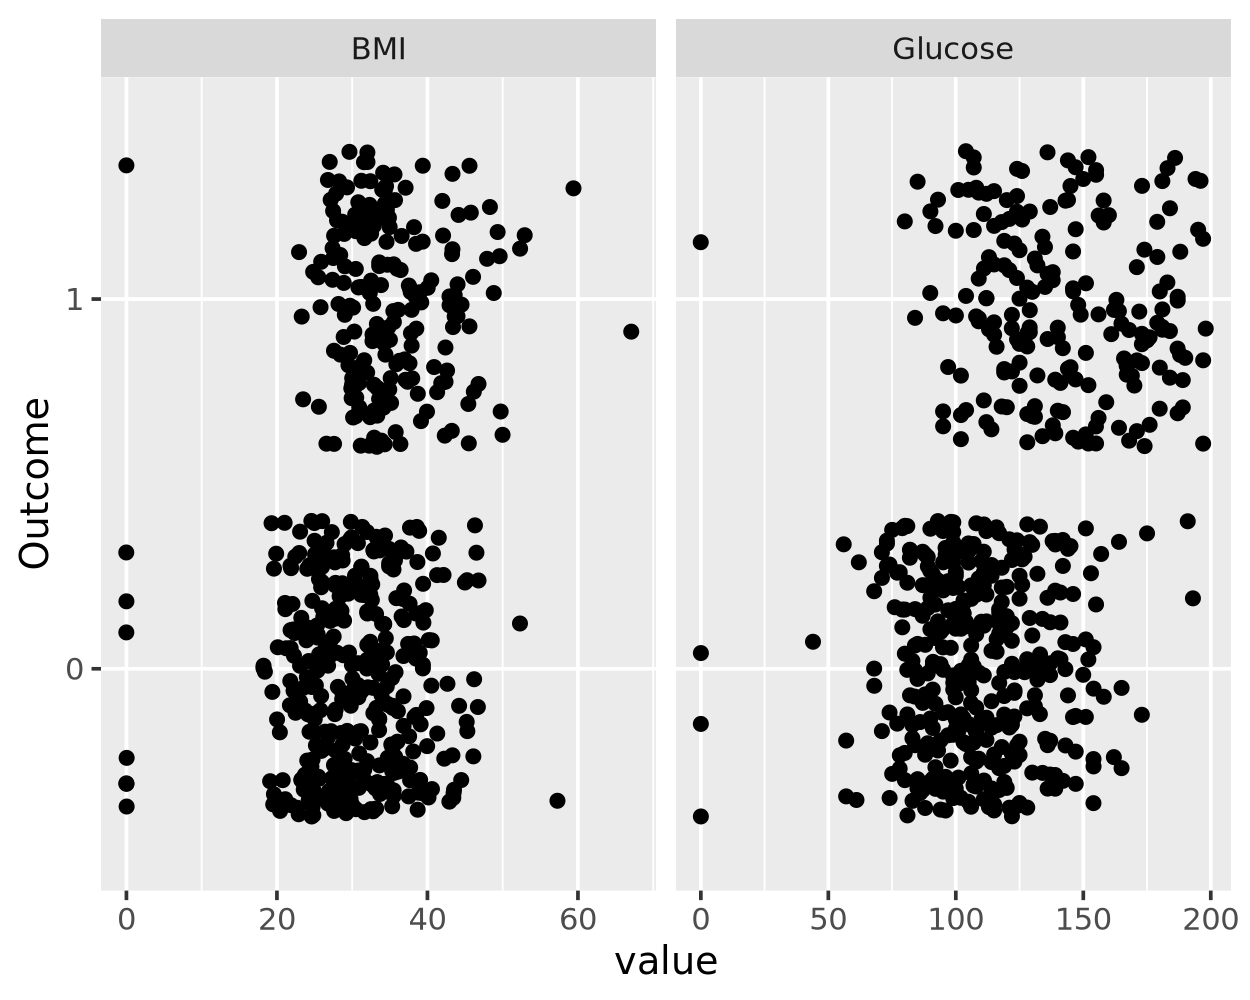

In [6]:
ggplot(data = plot_df, aes(x = value, y = Outcome)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Removing this argument from the facet_wrap function results in both graphs having the same scale for the x-axis. In this instance, that is not desirable as BMI and Glucose have two different ranges in terms of its measurement values. Removing this argument makes the BMI graph less able to illustrate the potential relationship between BMI and diabetes outcome.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [7]:
mod = logistic_reg() |> set_engine('glm')

mod

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

mod_fit

Logistic Regression Model Specification (classification)

Computational engine: glm 


parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.93269      0.07239      0.03991  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 560.7 	AIC: 566.7

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [8]:
diabetes_test_wPred = augment(mod_fit, diabetes_test) 
                        
diabetes_test_wPred



.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.34178886,0.65821114,0,137,40,35,168,43.1,2.288,33,1
0,0.80995072,0.19004928,5,116,74,0,0,25.6,0.201,30,0
0,0.92926189,0.07073811,3,78,50,32,88,31.0,0.248,26,1
0,0.94996728,0.05003272,8,125,96,0,0,0.0,0.232,54,1
1,0.17896349,0.82103651,10,168,74,0,0,38.0,0.537,34,1
0,0.85442597,0.14557403,7,100,0,0,0,30.0,0.484,32,1
0,0.51469289,0.48530711,3,126,88,41,235,39.3,0.704,27,0
1,0.05889952,0.94110048,7,196,90,0,0,39.8,0.451,41,1
1,0.39550105,0.60449895,11,143,94,33,146,36.6,0.254,51,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [9]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  29
         1  18  38

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

67 individuals had diabetes in the test data. Of those who actually had diabetes, the model predicted 38 of them to have diabetes. 18 individuals who did not have diabetes were predicted to have diabetes by the model.

